# 데이터 전처리

## 데이터 불러오기

수집된 데이터를 잘 활용하기 위해서 데이터를 정리하는 과정이 필요합니다. 보통은 데이터를 살펴 보는 탐색적 데이터 분석(EDA, exploratory data analysis) 과정과 같이 진행하며, 몇 주기에 걸쳐 업데이트하면서 정돈합니다.

엑셀, CSV(comma-separated values, 각 열을 쉼표로 구분해서 저장한 단순 텍스트 파일), TSV(tab-separated values) 등이 주로 쓰입니다. pandas에서는 read_excel() 함수나, read_csv() 함수(TSV의 경우 delimiter 옵션을 변경하여 불러오기 가능) 등을 이용해서 데이터 프레임으로 불러올 수 있습니다. 또한 데이터베이스에서 직접 불러오는 것도 가능합니다.

일반적으로는 각 열을 변수, 각 행이 한 번의 관측을 나타냅니다.

### 엑셀 파일 불러오기

In [1]:
import pandas as pd
df = pd.read_excel('sample.xlsx', sheet_name='Sheet1')

In [2]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,202.0,4.000,4.00,202.0,4.0
1,202.0,-6.800,-346.00,202.0,-9.6
2,200.0,-13.800,-2.25,200.0,-13.9
3,198.0,-14.000,4.00,198.0,-13.9
4,197.0,-13.900,-14.80,196.0,-13.9
...,...,...,...,...,...
95,163.0,3.875,-58.50,163.0,4.0
96,163.0,4.175,85.20,163.0,4.0
97,163.0,4.000,-8.50,163.0,4.0
98,163.0,4.050,29.00,163.0,4.0


In [3]:
# help(pd.read_csv)
pd.read_csv?

### CSV 파일 불러오기

다음은 pandas로 [붓꽃(iris) 데이터셋](https://gist.github.com/netj/8836201)을 불러 오는 예제입니다.

In [4]:
iris = pd.read_csv(
    "https://gist.githubusercontent.com"
    "/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


`DataFrame.info()`나 `.DataFrame.describe()` 함수로 간단한 데이터의 상태를 확인할 수 있습니다.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

## 데이터의 자료형

CSV는 단순한 텍스트 파일이므로, 숫자와 문자열의 구분이 되어있지 않습니다.
pandas에서는 기본적으로 각 열의 데이터를 파악하고 적절한 자료형으로 바꿔 주려고 시도하지만, 다양한 예외적 상황 때문에 제대로 되지 않는 경우가 있습니다.
또한 기본 자료형(int64, float64, object) 대신 메모리를 덜 차지하는 다른 자료형을 사용하거나, 범주형 데이터로 저장하기를 원할 수도 있습니다.
그러한 경우 직접 처리해 주어야 합니다.

데이터가 아주 큰 경우에는 차이가 많이 날 수 있습니다.
예를 들어 붓꽃 데이터에서 float64 대신 float32를 사용하고, 문자열 대신 범주형 데이터를 사용하면 다음과 같습니다.

In [8]:
def print_dataframe_size(df):
    df_memory_usage = df.memory_usage(deep=True)
    print(df_memory_usage)
    print(f"Total: {df_memory_usage.sum() / 1024 / 1024:.2f} MB")

large_iris = pd.concat([iris] * 20_000)
print(iris.dtypes)
print_dataframe_size(iris)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object
Index            128
sepal.length    1200
sepal.width     1200
petal.length    1200
petal.width     1200
variety         9800
dtype: int64
Total: 0.01 MB


In [9]:
large_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [10]:
print_dataframe_size(large_iris)

Index            24000000
sepal.length     24000000
sepal.width      24000000
petal.length     24000000
petal.width      24000000
variety         196000000
dtype: int64
Total: 301.36 MB


In [11]:
iris_float32 = iris.astype("float32", errors="ignore")
print(iris_float32.dtypes)
print_dataframe_size(iris_float32)

sepal.length    float32
sepal.width     float32
petal.length    float32
petal.width     float32
variety          object
dtype: object
Index            128
sepal.length     600
sepal.width      600
petal.length     600
petal.width      600
variety         9800
dtype: int64
Total: 0.01 MB


In [12]:
iris_categorical = iris_float32.astype({"variety": "category"})
print(iris_categorical.dtypes)
print_dataframe_size(iris_categorical)

# See https://stackoverflow.com/questions/30601830/when-to-use-category-rather-than-object

sepal.length     float32
sepal.width      float32
petal.length     float32
petal.width      float32
variety         category
dtype: object
Index           128
sepal.length    600
sepal.width     600
petal.length    600
petal.width     600
variety         454
dtype: int64
Total: 0.00 MB


## 결측치 처리

데이터에 결측이 발생했을 경우, 여러 가지 방법으로 처리할 수 있습니다.

1. 결정 트리 기반 알고리즘 등, 결측치가 존재해도 처리가 가능한 분석을 하려고 하는 경우, 그대로 둘 수 있습니다.
2. 행이 순서대로 저장되면서 변화량이 크지 않은 경우, 즉 결측치의 위아래 근처 행과 연관이 많은 경우, 주위 값을 이용해서 메웁니다.
3. 행의 순서가 데이터와 관계없는 경우, 결측치에 특별한 값(sentinel)을 주거나, 전체 데이터의 평균값 등 대표값을 일괄적으로 줄 수 있습니다.

In [13]:
df = pd.read_excel('sample.xlsx', sheet_name='Sheet2')

In [14]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.700,66.50,184.0,-13.90
1,NaN,-13.900,-33.50,182.0,-13.90
2,180.0,-13.800,110.00,180.0,-13.90
3,175.0,-13.800,22.80,175.0,-13.90
4,173.0,NaN,NaN,173.0,-13.90
5,161.0,-13.900,-8.50,161.0,-13.90
6,159.0,-13.700,22.80,159.0,-13.90
7,157.0,NaN,NaN,157.0,-13.90
8,155.0,-13.200,192.00,155.0,-10.30
9,155.0,3.925,NaN,NaN,NaN


In [15]:
df.isnull().sum()

X_ActualPosition        1
X_ActualVelocity        2
X_ActualAcceleration    4
X_SetPosition           1
X_SetVelocity           3
dtype: int64

### 결측치 제거

In [16]:
df.head()

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,NaN,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9
3,175.0,-13.8,22.8,175.0,-13.9
4,173.0,NaN,NaN,173.0,-13.9


In [17]:
df.dropna()

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.70,66.50,184.0,-13.90
2,180.0,-13.80,110.00,180.0,-13.90
3,175.0,-13.80,22.80,175.0,-13.90
5,161.0,-13.90,-8.50,161.0,-13.90
6,159.0,-13.70,22.80,159.0,-13.90
8,155.0,-13.20,192.00,155.0,-10.30
10,149.0,-1.82,-64.70,149.0,-1.64
11,148.0,-1.20,54.00,148.0,-1.33
13,147.0,-0.47,-8.50,147.0,-0.49
14,147.0,-0.05,10.25,147.0,0.06


In [18]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8
9


In [19]:
df.dropna(thresh=3) # 값이 3개 이상인 데이터만 남김

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.70,66.50,184.0,-13.90
1,NaN,-13.90,-33.50,182.0,-13.90
2,180.0,-13.80,110.00,180.0,-13.90
3,175.0,-13.80,22.80,175.0,-13.90
4,173.0,NaN,NaN,173.0,-13.90
5,161.0,-13.90,-8.50,161.0,-13.90
6,159.0,-13.70,22.80,159.0,-13.90
7,157.0,NaN,NaN,157.0,-13.90
8,155.0,-13.20,192.00,155.0,-10.30
10,149.0,-1.82,-64.70,149.0,-1.64


In [20]:
df.dropna(axis=1, thresh=15)

,X_ActualPosition,X_ActualVelocity,X_SetPosition
0,184.0,-13.700,184.0
1,NaN,-13.900,182.0
2,180.0,-13.800,180.0
3,175.0,-13.800,175.0
4,173.0,NaN,173.0
5,161.0,-13.900,161.0
6,159.0,-13.700,159.0
7,157.0,NaN,157.0
8,155.0,-13.200,155.0
9,155.0,3.925,NaN


In [21]:
df.dropna(subset=['X_ActualVelocity'])

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.700,66.50,184.0,-13.90
1,NaN,-13.900,-33.50,182.0,-13.90
2,180.0,-13.800,110.00,180.0,-13.90
3,175.0,-13.800,22.80,175.0,-13.90
5,161.0,-13.900,-8.50,161.0,-13.90
6,159.0,-13.700,22.80,159.0,-13.90
8,155.0,-13.200,192.00,155.0,-10.30
9,155.0,3.925,NaN,NaN,NaN
10,149.0,-1.820,-64.70,149.0,-1.64
11,148.0,-1.200,54.00,148.0,-1.33


### 결측치 채우기

In [22]:
df.head(3)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,NaN,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9


In [23]:
df.fillna(method="ffill").head(3)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,184.0,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9


In [24]:
df.fillna(method="bfill").head(3)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,180.0,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9


In [25]:
df.interpolate().head(3)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,182.0,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9


In [26]:
df.mean()

X_ActualPosition        158.500000
X_ActualVelocity         -5.569000
X_ActualAcceleration     34.800000
X_SetPosition           160.187500
X_SetVelocity            -8.417857
dtype: float64

In [27]:
df.head(6)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.7,66.5,184.0,-13.9
1,NaN,-13.9,-33.5,182.0,-13.9
2,180.0,-13.8,110.0,180.0,-13.9
3,175.0,-13.8,22.8,175.0,-13.9
4,173.0,NaN,NaN,173.0,-13.9
5,161.0,-13.9,-8.5,161.0,-13.9


In [28]:
df.fillna(value=df.mean()).head(6)

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity
0,184.0,-13.700,66.5,184.0,-13.9
1,158.5,-13.900,-33.5,182.0,-13.9
2,180.0,-13.800,110.0,180.0,-13.9
3,175.0,-13.800,22.8,175.0,-13.9
4,173.0,-5.569,34.8,173.0,-13.9
5,161.0,-13.900,-8.5,161.0,-13.9


## 범주형 데이터 다루기
- 순서가 있는 특성 vs. 순서가 없는 특성
- 순서 특성 매핑
- 원-핫 인코딩

In [29]:
iris['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [30]:
iris['variety'].astype('category')

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: category
Categories (3, object): ['Setosa', 'Versicolor', 'Virginica']

### 순서특성매핑

In [31]:
iris['variety'].map({'Setosa':1, 'Versicolor':2, 'Virginica':3}).astype('int8')

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: variety, Length: 150, dtype: int8

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
class_le = LabelEncoder()

In [34]:
y = class_le.fit_transform(iris['variety'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
class_le.inverse_transform(y)

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

### 원핫인코딩

In [36]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [37]:
pd.get_dummies(iris)

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [38]:
pd.get_dummies(iris, drop_first=True)

,sepal.length,sepal.width,petal.length,petal.width,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


## 데이터를 훈련세트와 테스트세트로 나누기

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X, y = iris.iloc[:,:-1], iris.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
len(X_train), len(X_test)

(105, 45)

In [43]:
print(y_train.value_counts())
print(y_test.value_counts())

Virginica     39
Setosa        34
Versicolor    32
Name: variety, dtype: int64
Versicolor    18
Setosa        16
Virginica     11
Name: variety, dtype: int64


In [44]:
y.value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [46]:
print(y_train.value_counts())
print(y_test.value_counts())

Versicolor    35
Virginica     35
Setosa        35
Name: variety, dtype: int64
Versicolor    15
Virginica     15
Setosa        15
Name: variety, dtype: int64


## 데이터 정규화
- 정규화: 특성의 스케일을 특정 범위 $[a,b]$로 맞추는 것

예) **최소-최대 스케일 변환**
$$
x^{(i)}_{norm} = \frac{x^{(i)} - x_{min}}{x_{max}-x_{min}}
$$
여기서 $x^{(i)}$는 특정 샘플, $x_{max}$는 최대값이고 $x_{min}$는 최소값

- 표준화: 특성의 평균을 0에 맞추고 표준편차를 1로 만들어 정규 분포와 같은 특징을 갖도록 하는 것
$$
x^{(i)}_{std} = \frac{x^{(i)}-\mu_x}{\sigma_x}
$$
여기서 $\mu_x$는 평균, $\sigma_x$는 표준편차

인공신경망의 입력 데이터처럼 데이터의 절댓값보다는 분포가 더 중요한 경우에는 데이터를 정규화하는 것이 좋습니다.

In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [48]:
iris.reset_index()

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,0,5.1,3.5,1.4,0.2,Setosa
1,1,4.9,3.0,1.4,0.2,Setosa
2,2,4.7,3.2,1.3,0.2,Setosa
3,3,4.6,3.1,1.5,0.2,Setosa
4,4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Virginica
146,146,6.3,2.5,5.0,1.9,Virginica
147,147,6.5,3.0,5.2,2.0,Virginica
148,148,6.2,3.4,5.4,2.3,Virginica


<AxesSubplot:>

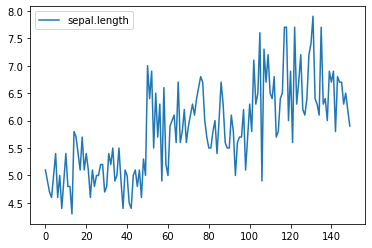

In [49]:
iris[['sepal.length']].plot()

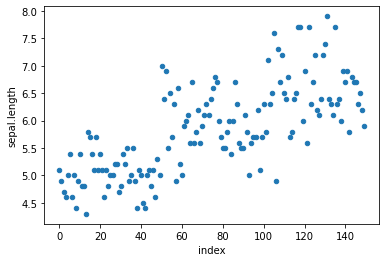

In [50]:
iris.reset_index().plot.scatter(x='index', y='sepal.length');

In [51]:
iris['sl_minmax'] = MinMaxScaler().fit_transform(iris[['sepal.length']])

In [52]:
iris['sl_minmax']

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sl_minmax, Length: 150, dtype: float64

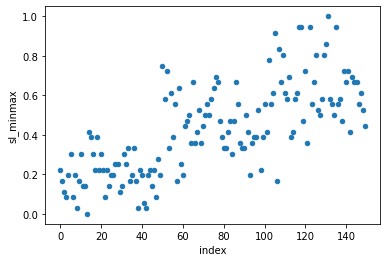

In [53]:
iris.reset_index().plot.scatter(x='index', y='sl_minmax');

In [54]:
iris['sl_standard'] = StandardScaler().fit_transform(iris[['sepal.length']])

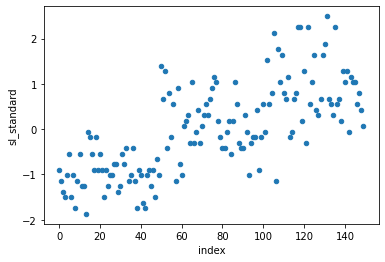

In [55]:
iris.reset_index().plot.scatter(x='index', y='sl_standard');

### 훈련세트와 테스트세트에 정규화를 적용하는 경우 유의할 점

주의: 학습세트와 평가 세트를 나눌 경우, 동일한 정규화를 사용해야 합니다.

In [56]:
mms = MinMaxScaler()

In [57]:
X_train_mms = mms.fit_transform(X_train)

In [58]:
X_train.values[:5]

array([[6.7, 3.3, 5.7, 2.5],
       [7.7, 3.8, 6.7, 2.2],
       [6.4, 3.2, 5.3, 2.3],
       [4.6, 3.6, 1. , 0.2],
       [5.2, 3.4, 1.4, 0.2]])

In [59]:
X_train_mms[:5]

array([[0.66666667, 0.54166667, 0.79661017, 1.        ],
       [0.94444444, 0.75      , 0.96610169, 0.875     ],
       [0.58333333, 0.5       , 0.72881356, 0.91666667],
       [0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.25      , 0.58333333, 0.06779661, 0.04166667]])

In [60]:
X_test_mms = mms.transform(X_test)
X_test_mms[:5]

array([[0.55555556, 0.58333333, 0.77966102, 0.95833333],
       [0.41666667, 0.29166667, 0.69491525, 0.75      ],
       [0.22222222, 0.58333333, 0.08474576, 0.04166667],
       [0.22222222, 0.75      , 0.15254237, 0.125     ],
       [0.75      , 0.5       , 0.62711864, 0.54166667]])